<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
#импортируем библиотеки необходимые для подготовки данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

<div class="alert alert-info">
<font color='Blue'>
Предполагалось использование plt из-за гистограмм, но ограничилось применение их из numpy. В дальнейшем буду внимательнее

In [2]:
df = pd.read_csv('/datasets/Churn.csv') # открываем файл Churn.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-info">
 <font color='Blue'>
     <b>Пропуски обнаружены только в столбце Tenure (сколько лет человек является клиентом банка) - пропуски можно заполнить медианным значением

In [4]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median()) # заполняю пропуски медианными значениями

<div class="alert alert-info">
<font color='Blue'>
    <b>Привожу к нижнему регистру название столбцов и данные в четырёх столбцах 'Surname','Geography', и'Gender' со значениями "str"

In [5]:
df.columns = map(str.lower, df.columns)
for column in df[['surname','geography','gender']]:
    df[column] = df[column].str.lower()
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df['geography'].unique() # проверяю столбец на количество уникальных данных

array(['france', 'spain', 'germany'], dtype=object)

<div class="alert alert-info">
<font color='Blue'>
    <b>В Столбце geography всего три уникальных значения: 'france', 'spain', 'germany'

In [7]:
df.duplicated().sum()

0

In [8]:
df['customerid'].value_counts().sum() 

10000

<div class="alert alert-info">
<font color='Blue'>
    <b>Дубликатов в данных не обнаружено <p>
        Столбцы: rownumber, customerld и surname можно удалить, так как не несут ценности для обучения модели.

In [9]:
for_drop = ['rownumber','customerid', 'surname']
df_ml = df.drop(for_drop, axis=1) # удаляю столбцы, не представляющие ценностия для обучения модели
df_ml.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2.0,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1.0,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2.0,125510.82,1,1,1,79084.10,0


In [10]:
df_ml.shape

(10000, 11)

<div class="alert alert-info">
<font color='Blue'>
    <b>Подготовим данные методом OHE

In [11]:
df_ml = pd.get_dummies(df_ml,drop_first=True)
df_ml.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
df_ml.shape

(10000, 12)

<div class="alert alert-info">
<font color='Blue'>
    <b> Новый 12 столбцов.
Столбец Geography содержал 3 класса, Gender_Male 2 класса — в результате мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дами-ловушки.

<div class="alert alert-info">
<font color='Blue'>
    Ошибочно не исправил старый комментарий. После get_dummies получили три столбца с национальностью вместо одного и два с полом вместо одного.

<div class="alert alert-info">
<font color='Blue'>
    Изначально писал drop_first=True, но тогда мне казалось, что теряются данные(один столбец). Добавил, Спасибо!

## Исследование задачи

<div class="alert alert-info">
<font color='Blue'>
Исследуем классы(1 и 0) на вес

0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

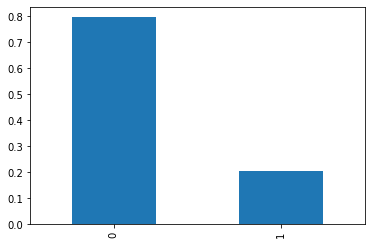

In [13]:
class_frequency = df_ml['exited'].value_counts(normalize= True) # < напишите код здесь >)
print(class_frequency)
class_frequency.plot(kind='bar')

<div class="alert alert-info">
<font color='Blue'>
Попробуем обучить модель без учета дисбаланса классов. Поскольку задача классификации, применим Логистическую регрессию

In [14]:
target = df_ml['exited']
features = df_ml.drop('exited', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                    train_size=0.6, 
                                                    random_state=12345)

In [15]:
features_test, features_valid, target_test, target_valid = train_test_split(features_test, target_test, 
                                                    train_size=0.5, 
                                                    random_state=12345,
                                                    )

In [16]:
best_solver = None
best_iter = 0
best_lr_model = None
best_result=0

for solver in ['lbfgs', 'saga', 'newton-cg', 'liblinear']:
    for m_iter in [100, 1000, 10000]:
        model = LogisticRegression(random_state=12345, solver=solver, max_iter=m_iter) 
        model.fit(features_train, target_train)
        current_predictions=model.predict(features_valid)
        result = f1_score(target_valid, current_predictions)
        if result >best_result:
                best_iter = m_iter
                best_result = result
                best_solver = solver
print(best_iter, best_result, best_solver)

100 0.28822495606326887 newton-cg


Лучшая точность у метода Ньютона с максимальным количеством Итераций = 100

<div class="alert alert-info">
<font color='Blue'>
Исправил score на f1_score. Соответственно теперь у логрегрессии лучшее значение f1 = 0.28. Ниже описал для дерева

In [17]:
best_model=LogisticRegression(random_state=12345, solver='newton-cg',max_iter=100)
best_model.fit(features_train, target_train)

LogisticRegression(random_state=12345, solver='newton-cg')

In [18]:
best_result=0
best_depth = 0
best_model = None

for depth in range(1, 6):
    model = tree.DecisionTreeClassifier(random_state=21,max_depth=depth)
    model.fit(features_train, target_train)
    current_predictions=model.predict(features_valid)
    result = f1_score(target_valid, current_predictions)
    if result >best_result:
        best_model = model
        best_result = result
        best_depth = depth
print(best_result, best_depth)

0.5015772870662459 5


<div class="alert alert-info">
<font color='Blue'>
Точность у дерева оказалась выше

## Борьба с дисбалансом

<div class="alert alert-info">
<font color='Blue'>
Улучшим качество модели, учитывая дисбаланс классов.  Добавим параметр class_weight='balanced' для дерева:

In [19]:
best_model=tree.DecisionTreeClassifier(random_state=21,max_depth=5,class_weight='balanced')
best_model.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=21)

In [20]:
predictions=best_model.predict(features_valid)

In [21]:
f1_score(target_valid, predictions)

0.5809128630705395

<div class="alert alert-info">
<font color='Blue'>
    Аналогично для логистической регрессии с наилучшими параметрами:

In [22]:
best_model=LogisticRegression(random_state=12345, solver='newton-cg',max_iter=100, class_weight='balanced')
best_model.fit(features_train, target_train)
predictions=best_model.predict(features_valid)

In [23]:
f1_score(target_valid, predictions)

0.47799827437446074

<div class="alert alert-info">
<font color='Blue'>
Попробуем увеличить выборку техникой upsampling. Увеличить нужно положительные объекты

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [25]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


0    0.501043
1    0.498957
Name: exited, dtype: float64


<AxesSubplot:>

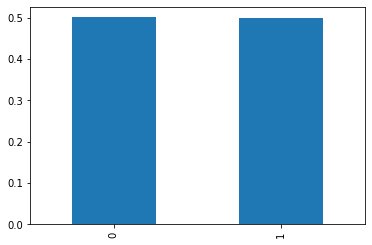

In [26]:
class_frequency = target_upsampled.value_counts(normalize= True) # < напишите код здесь >)
print(class_frequency)
class_frequency.plot(kind='bar')

In [35]:
model=LogisticRegression(solver='newton-cg',random_state=12345,max_iter=100).fit(features_upsampled,target_upsampled)
predicted_valid=model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4757785467128028


<div class="alert alert-info">
<font color='Blue'>
Получен тот же результат, что и при параметре class_weight='balanced'

In [36]:
model=tree.DecisionTreeClassifier(random_state=21,max_depth=5).fit(features_upsampled,target_upsampled)
predicted_valid=model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5809128630705395


<div class="alert alert-info">
<font color='Blue'>
    Возможно, техника downsampling покажет лучший результат

In [37]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [38]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

0    0.501043
1    0.498957
Name: exited, dtype: float64


<AxesSubplot:>

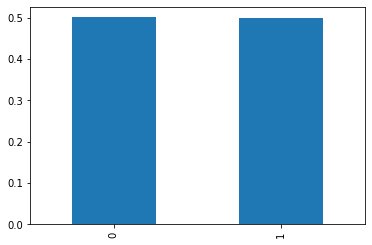

In [39]:
class_frequency = target_downsampled.value_counts(normalize= True) # < напишите код здесь >)
print(class_frequency)
class_frequency.plot(kind='bar')

In [40]:
model=LogisticRegression(solver='liblinear',random_state=12345).fit(features_downsampled,target_downsampled)
predicted_valid=model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.43464314354450684


<div class="alert alert-info">
<font color='Blue'>
    Downsample показывает куда более худший результат.

<div class="alert alert-info">
<font color='Blue'>
    В таком случае остановимся на варианте с upsampling

## Тестирование модели

<div class="alert alert-info">
<font color='Blue'>
    Применяем технику upsampled к тренировочным данным с коэффициентом 4, обучаем модель дерева решений с глубиной 5 на этих данных и предсказываем.

In [41]:
model=tree.DecisionTreeClassifier(random_state=21,max_depth=5).fit(features_upsampled,target_upsampled)
predicted_test=model.predict(features_test)

print("F1:", f1_score(target_test, predicted_test))

F1: 0.5963791267305644


<div class="alert alert-info">
<font color='Blue'>
    Посчитаем метрику roc_auc

In [42]:
roc_auc_score(target_test, model.predict_proba(features_test)[:,1])

0.8310244134068074

<div class="alert alert-info">
<font color='Blue'>
    Поскольку задача классификации, то значение roc_auc = 0.83 - очень хороший результат

<div class="alert alert-info">
<font color='Blue'>
Вывод:
    В ходе выполнения проекта была проведена преодобработка данных, а также попытки справиться с дисбалансом классов(например, с помощью техники upsampling и downsampling). В ходе проверок разных моделей, оказалось, что дерево решений с уравновешенными классами с помощью upsampling и глубиной 5 показвыает наилучшее значение метрики f1 = 0.59. Метрика roc_auc получилась 0.83, что говорит о неплохой эффективности модели.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*